# G-Mapper Applied to Synthetic Examples

## Import Packages

In [1]:
from mapper import Cover, generate_mapper_graph
from mapper_gmean_cover import *
from visualization import pyvis_visualize
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import time

## Two Circles

In [2]:
data='two-circle'

### 0. Loading and Plotting Dataset

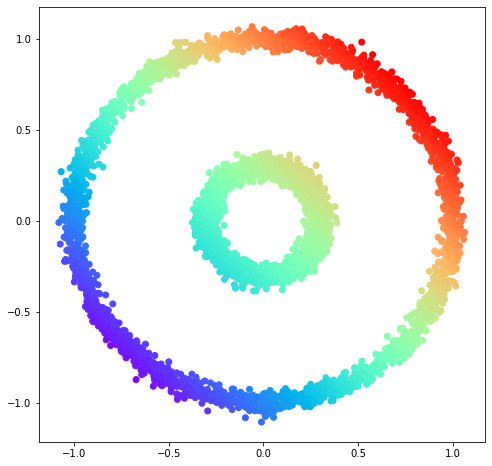

In [3]:
# Load Data
X=pd.read_csv('examples/'+str(data)+'.csv')
X=np.nan_to_num(X.values)

# Plot Data
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1],c=X[:,1]+X[:,0], cmap=plt.cm.rainbow)
plt.show()

### 1. Lens Function

In [4]:
lens = (X[:, 0]+X[:, 1])
lens = (lens-np.min(lens))/(np.max(lens)-np.min(lens)) # normalize

### 2. Cover (G-Mapper)

In [5]:
ad_threshold = 10
g_overlap = 0.1
iterations = 20
method = 'DFS'

np.random.seed(2023) # set seed so this graph is reproducible
start_time = time.time() # time how long G-Mapper takes
g_cover = gmeans_cover(X, lens, iterations, max_intervals=30, method=method, ad_threshold=ad_threshold, g_overlap=g_overlap)
print("--- %s seconds ---" % (time.time() - start_time)) # print time

	LOG: Convergence after 7 iterations.
--- 0.1655569076538086 seconds ---


### 3. Clustering Pre-images

In [6]:
clusterer = DBSCAN(eps=0.1, min_samples=5) # clustering algorithm: DBSCAN

### 4. Mapper Graph

In [7]:
graph = generate_mapper_graph(X, lens, g_cover, clusterer=clusterer, refit_cover=False) # compute Mapper graph
pyvis_visualize(graph, title='G-Mapper_'+str(data)+'_'+str(method), fname='G-Mapper_'+str(data)+'_'+str(method)+'.html') # save visualization

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


### - Reference Mapper Graph

In [8]:
# 1. Lens
lens = (X[:, 0]+X[:, 1])
lens = (lens-np.min(lens))/(np.max(lens)-np.min(lens)) # normalize

# 2. Cover
num_intervals = 7
overlap = 0.2

cover = Cover(num_intervals=num_intervals, percent_overlap=overlap, enhanced=False)

# 3. Clustering the Pre-image 
clusterer = DBSCAN(eps=0.1, min_samples=5) # clustering algorithm: DBSCAN

# 4. Mapper Graph
graph = generate_mapper_graph(X, lens, cover=cover, clusterer=clusterer, refit_cover=False) #  compute Mapper graph
pyvis_visualize(graph, title='Reference_'+str(data),fname='Reference_'+str(data)+'.html') #  save visualization

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 




## Human

In [9]:
data='human'

### 0. Loading and Plotting Dataset

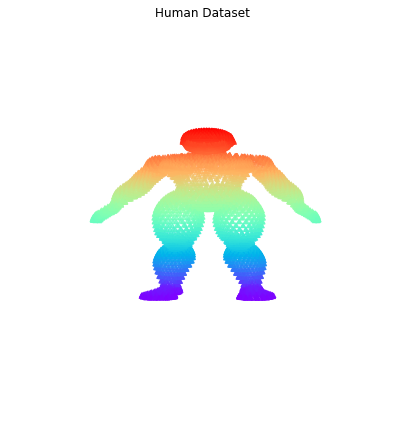

In [10]:
# Load data
X=pd.read_csv('examples/'+str(data)+'.csv', sep=",")
X=np.nan_to_num(X.values)

# Plot data
my_cmap=plt.cm.rainbow
fig = plt.figure(figsize = (7, 17))
ax = plt.axes(projection ="3d")
ax.set_axis_off()
ax.scatter3D(X[:,0], X[:,1], X[:,2], alpha = 0.8,
                    c = (X[:,2]),
                    cmap = my_cmap,
                    marker ='^')
plt.title("Human Dataset")
ax.view_init(0, 92)
plt.show()

### 1. Lens Function

In [11]:
lens = X[:,2]
lens = (lens-np.min(lens))/(np.max(lens)-np.min(lens))  # normalize

### 2. Cover (G-Mapper)

In [12]:
AD_threshold = 10
g_overlap = 0.1
iterations = 30
method = 'DFS'

np.random.seed(2020) # set seed so this graph is reproducible
start_time = time.time() 
g_cover=gmeans_cover(X,lens, iterations, max_intervals=30, method=method, g_overlap=g_overlap, ad_threshold=AD_threshold)
print("--- %s seconds ---" % (time.time() - start_time)) # print time for computing intervals

	LOG: Convergence after 11 iterations.
--- 0.18601250648498535 seconds ---


### 3. Clustering Pre-images

In [13]:
clusterer = DBSCAN(eps=0.1, min_samples=5) # clustering algorithm: DBSCAN

### 4. Mapper Graph

In [14]:
graph = generate_mapper_graph(X, lens, g_cover, clusterer=clusterer, refit_cover=False) # compute Mapper graph
pyvis_visualize(graph, title='G-Mapper_'+str(data)+'_'+str(method), fname = 'G-Mapper_'+str(data)+'_'+str(method)+'.html') # save visualization

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


### Reference Mapper Graph

In [15]:
# 1. Lens
lens = X[:,0]
lens = (lens-np.min(lens))/(np.max(lens)-np.min(lens)) # normalize

# 2. Cover
num_intervals = 30
overlap = 0.4

cover = Cover(num_intervals=num_intervals, percent_overlap=overlap)

# 3. Clustering Pre-images
clusterer = DBSCAN(eps= 0.21, min_samples=5) # clustering algorithm: DBSCAN

# 4. Mapper Graph
graph = generate_mapper_graph(X, lens, cover = cover, clusterer = clusterer, refit_cover = False) #  compute Mapper graph
pyvis_visualize(graph, title='Reference_'+str(data),fname='Reference_'+str(data)+'.html') #  save visualization

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 




## Klein Bottle

In [16]:
data='KleinBottle5D'

### 0. Loading and Plotting Dataset

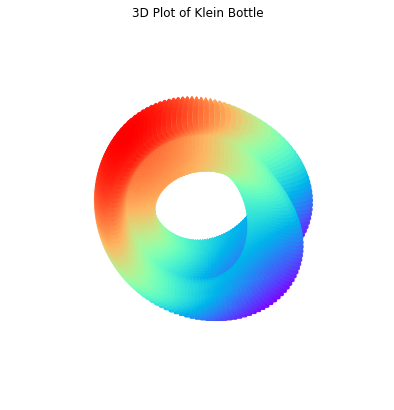

In [17]:
# Load data
X = pd.read_csv('examples/'+str(data)+'.csv')
X = np.nan_to_num(X.values)

# Plot data
my_cmap = plt.cm.rainbow
fig = plt.figure(figsize=(15,7))
ax = plt.axes(projection="3d")
ax.set_axis_off()
ax.scatter3D(X[:,0], X[:,1], X[:,2], alpha = 0.8, c = (X[:,0]), cmap=my_cmap, marker='^')
plt.title("3D Plot of Klein Bottle")
ax.view_init(-70, 45)
plt.show()

### 1. Lens Function

In [18]:
lens = X[:,0]
lens = (lens-np.min(lens))/(np.max(lens)-np.min(lens)) # normalize

### 2. Cover (G-Mapper)

In [19]:
AD_threshold = 15
g_overlap = 0.1
iterations = 20
method = 'DFS'

np.random.seed(2024) # set seed so this graph is reproducible
start_time = time.time() # time how long G-Mapper takes
g_cover=gmeans_cover(X,lens,iterations, max_intervals=30, method=method, g_overlap=g_overlap, ad_threshold=AD_threshold)
print("--- %s seconds ---" % (time.time() - start_time)) # print time

	LOG: Convergence after 16 iterations.
--- 0.4278576374053955 seconds ---


### 3. Clustering Pre-images

In [20]:
clusterer = DBSCAN(eps = 0.21, min_samples = 5) # clustering algorithm: DBSCAN

### 4. Mapper Graph

In [21]:
graph = generate_mapper_graph(X, lens, g_cover, clusterer=clusterer, refit_cover=False) # compute Mapper graph
pyvis_visualize(graph, title='G-Mapper_'+str(data)+'_'+str(method), fname = 'G-Mapper_'+str(data)+'_'+str(method)+'.html') # save visualization

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


### - Reference Mapper Graph

In [22]:
# 1. Lens
lens = X[:,0]
lens = (lens-np.min(lens))/(np.max(lens)-np.min(lens)) # normalize

# 2. Cover
num_intervals = 19
overlap = 0.4

cover = Cover(num_intervals=num_intervals, percent_overlap=overlap)

# 3. Clustering Pre-images 
clusterer = DBSCAN(eps= 0.21, min_samples=5) # clustering algorithm: DBSCAN

# 4. Mapper Graph
graph = generate_mapper_graph(X, lens, cover = cover, clusterer = clusterer, refit_cover = False) #  compute Mapper graph
pyvis_visualize(graph, title='Reference_'+str(data),fname='Reference_'+str(data)+'.html') #  save visualization

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 
